In [1]:
import os 

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

import numpy as np
import torch

import pandas as pd
# import optuna

from dotenv import load_dotenv
load_dotenv()

True

In [270]:
def load_results(dataset_name, percentage, scale, batch_size, epochs, loss_function_name, optimizer_name, lr, 
                 precond_method, pcg_method, hutch_init_iters, seed):
    
    results_path = os.getenv("RESULTS_DIR")
    directory = f"{results_path}/{dataset_name}/percentage_{percentage}/scale_{scale}/bs_{batch_size}" \
    f"/epochs_{epochs}/{loss_function_name}/{optimizer_name}/lr_{lr}/precond_{precond_method}/pcg_method_{pcg_method}/hutch_init_iters_{hutch_init_iters}/seed_{seed}"

    loss = torch.load(f"{directory}/loss")
    grad_norm_sq = torch.load(f"{directory}/grad_norm_sq")
    acc = torch.load(f"{directory}/acc")
    cg_steps = 0
    if precond_method == "pcg":
        cg_steps = torch.load(f"{directory}/cg_steps")

    return {
        "loss": loss,
        "grad_norm_sq": grad_norm_sq,
        "acc": acc,
        "cg_steps": cg_steps
    }


def moving_average(a, n=2) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [271]:
methods_palette = {
    "psps_none": "#009d9a",
    "psps_scaling_vec": "#fa4d56",
    "psps_hess_diag": "#ee538b",
    "psps2_none": "#005d5d",
    "psps2_scaling_vec": "#570408",
    "psps2_hess_diag": "#9f1853",

    "sgd": "#002d9c",
    "sp2_glm": "#ffc300",

    "psps2_pcg_none": "darkviolet",
    "psps2_pcg_hutch": "slateblue",

    "psps2_pcg_adam": "forestgreen",
    "psps2_pcg_adam_scaled": "deeppink",

    
    "psps2_pcg_adagrad": "deepskyblue",
    "psps2_pcg_adagrad_scaled": "mediumorchid",

    # "psps2_pcg_adam": "forestgreen",
    # "psps2_pcg_adagrad": "deepskyblue", 

    "psps2_pcg_hess_diag": "slateblue",
    "psps2_pcg_hess_diag_scaled": "darkorange",
     

    "psps2_hess_diag_none": "mediumslateblue",
    "psps2_hess_diag_none_scaled": "aqua",

    "psps2_hutch_none": "forestgreen",
    "psps2_adam_none": "",
    "psps2_adam_m_none": "darkorange",
    "psps2_adam_m_none_scaled": "teal",
    "psps2_adagrad_none": "",

    "psps2_adagrad_m_none": "yellowgreen",
    "psps2_adagrad_m_none_scaled": "hotpink",


    "psps2_true_hessian_none": "darkviolet",

    "adam": "sienna",
    "adam_scaled": "forestgreen",

    "adagrad": "dodgerblue",
    "adagrad_scaled": "darkviolet", 

    "adadelta": "#e63946",
    "adadelta_scaled": "darkorange",
}

methods_gov_name = {
    "psps_none": "SPS",
    "psps_scaling_vec": r"PSPS $(V^{-1})^2$",
    "psps_hess_diag": r"PSPS $diag(H^{-1})$",

    "psps2_none": r"SANIA $\mathit{I}_d$",
    "psps2_scaling_vec": r"SANIA $(V^{-1})^2$",
    "psps2_hess_diag": r"SANIA $diag(H^{-1})$",

    "sgd": "SGD",
    "adam": "Adam",
    "adagrad": "AdaGrad",
    "adadelta": "Adadelta",

    "sp2_glm": "SP2 GLM",
    
    "psps2_pcg_none": r"SANIA CG",
    "psps2_pcg_hutch": r"SANIA PCG Hutch",
    # "psps2_pcg_adam": r"SANIA PCG Adam",
    # "psps2_pcg_adagrad": r"SANIA PCG AdaGrad",
    "psps2_pcg_adam": r"SANIA PCG Adam-SQR",
    "psps2_pcg_adagrad": r"SANIA PCG AdaGrad-SQR",
    "psps2_pcg_hess_diag": r"SANIA PCG $diag(H_0)^{-1}$",

    "psps2_hutch_none": r"SANIA Hutch",

    "psps2_adam_none": r"SANIA Adam",
    "psps2_adam_m_none": r"SANIA Adam-SQR",
    "psps2_adagrad_none": r"SANIA AdaGrad",
    "psps2_adagrad_m_none": r"SANIA AdaGrad-SQR",
    "psps2_hess_diag_none": r"SANIA $diag(H_0)^{-1}$",
    "psps2_true_hessian_none": r"SANIA Newton",

}

FileNotFoundError: [Errno 2] No such file or directory: '/l/users/farshed.abdukhakimov/psps2/results/mushrooms/percentage_1.0/scale_0/bs_256/epochs_500/logreg/psps2/lr_1.0/precond_pcg/pcg_method_adagrad/hutch_init_iters_1000/seed_0/cg_steps'

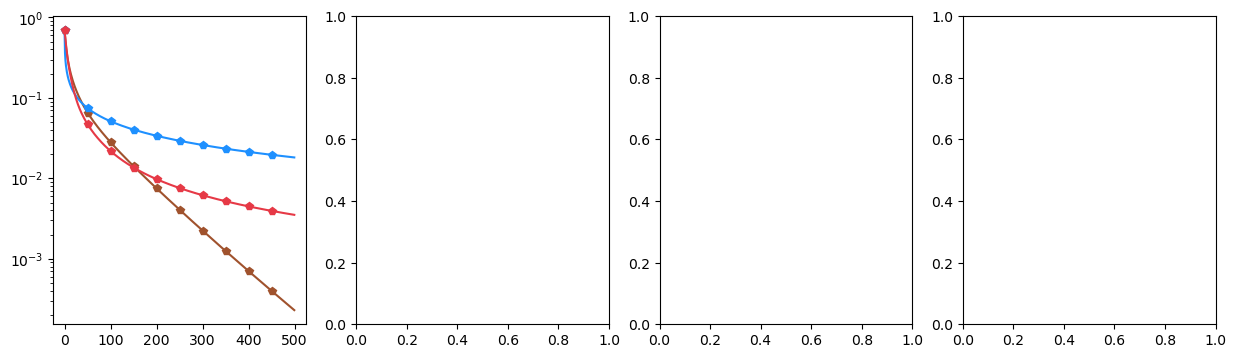

In [294]:
epochs = 500

axis_num = 4
fig, ax = plt.subplots(1, axis_num, figsize=(15, 4))

datasets = ["mushrooms", "colon-cancer", "duke", "leu"]
loss = "logreg"

dataset_scale = 6

lr_pow_dict = {

    "mushrooms-6-500-256-adam-logreg": -10,
    "mushrooms-6-500-256-adagrad-logreg": -6,
    "mushrooms-6-500-256-adadelta-logreg": -2,
    
    "synthetic-classification-1000x1000-6-500-200-adam-logreg": -6, # -8
    "synthetic-classification-1000x1000-6-500-200-adagrad-logreg": -6, # -4
    "synthetic-classification-1000x1000-6-500-200-adadelta-logreg": -4, # -4
     
    "colon-cancer-6-500-16-adam-logreg": -10,
    "colon-cancer-6-500-16-adagrad-logreg": -6,
    "colon-cancer-6-500-16-adadelta-logreg": -2,
    
    "duke-6-500-16-adam-logreg": -12,
    "duke-6-500-16-adagrad-logreg": -8,
    "duke-6-500-16-adadelta-logreg": -2,

    "leu-6-500-16-adam-logreg": -12,
    "leu-6-500-16-adagrad-logreg": -8,
    "leu-6-500-16-adadelta-logreg": -2,
}

get_ds_size = {
    "mushrooms": (112, 8124),
    "synthetic-classification-1000x1000": (1000, 1000),
    "colon-cancer": (62, 2000),
    "duke": (44, 7129),
    "leu": (38, 7129)
}

for axis, dataset_name, batch_size in zip(range(axis_num), datasets, [256, 16, 16]):
    for scale in [0, dataset_scale]:
        for opt in ["adam", "adagrad", "adadelta"]:

            study_name = f"{dataset_name}-{dataset_scale}-{epochs}-{batch_size}-{opt}-{loss}"
            # storage_name = f"sqlite:///experiments/optuna/{study_name}.db"
            # study = optuna.load_study(study_name=study_name, storage=storage_name)
            # lr = study.best_params["lr"]

            lr = 2**lr_pow_dict.get(study_name)

            results = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", opt, lr, "none", "none", 1000, seed)["loss"]
                results.append(res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[opt] 

            if scale > 0:
                marker = ""
                linestyle = "--"
                # color = methods_palette[opt + "_scaled"]
    

            label = methods_gov_name[opt] + r" lr=$2^{-6}$"

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)



        for method, pcg_method in zip(["pcg", "adam_m", "adagrad_m"], ["adagrad", "none", "none"]):
            results = []
            cg_steps = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, method, pcg_method, 1000, seed)
                loss_res = res["loss"]
                results.append(loss_res)
                if method == "pcg":
                    cg_res = res["cg_steps"]
                    cg_steps.append(cg_res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)


            if method == "pcg":
                cg_mean_line = np.mean(cg_steps, axis=0)
                x = np.rint(cg_mean_line / np.ceil(get_ds_size[dataset_name][0] / batch_size))
            else:
                x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
            
            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[f"psps2_{method}_{pcg_method}"]

            if scale > 0:
                marker = ""
                linestyle = "--"
                color = methods_palette[f"psps2_{method}_{pcg_method}_scaled"]


            label = methods_gov_name[f"psps2_{method}_{pcg_method}"]

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"]),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"]),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"]),

                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad"], label=methods_gov_name["psps2_pcg_adagrad"]),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad_scaled"], linestyle="--", label=methods_gov_name["psps2_pcg_adagrad"]),
                
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none_scaled"], linestyle="--", label=methods_gov_name["psps2_adam_m_none"]),

                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none"], label=methods_gov_name["psps2_adagrad_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none_scaled"], linestyle="--", label=methods_gov_name["psps2_adagrad_m_none"]),

                    ]

legend1 = fig.legend(handles=legend1_elements, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=9)
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = ax[2].legend(handles=legend2_elements, loc='lower right')
# ax[2].gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
fig.text(0.5, 0.0, "epochs")

fig.tight_layout()

for ax_id, dataset_name in zip(range(axis_num), datasets):
    ax[ax_id].set_title(dataset_name)
    ax[ax_id].grid()
    # ax[ax_id].set_ylim(bottom=1e-13)

# fig.savefig("experiments/plots/exp_convex.pdf", format="pdf", bbox_inches='tight')

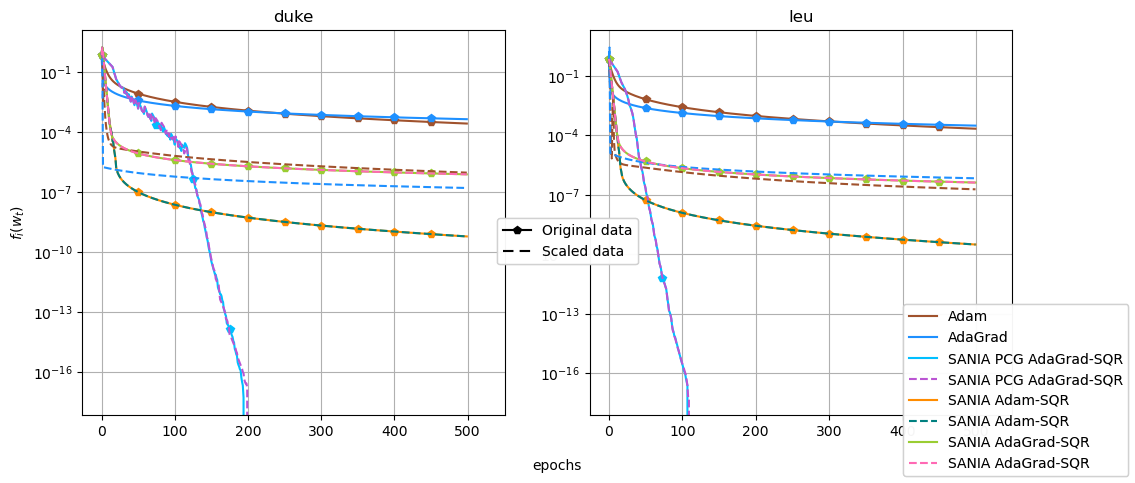

In [273]:
epochs = 500

axis_num = 2
fig, ax = plt.subplots(1, axis_num, figsize=(12, 5))

datasets = ["duke", "leu"]
dataset_scale = 6
loss = "logreg"

lr_pow_dict = {

    "synthetic-classification-1000x1000-6-500-200-adam-logreg": -6, # -8
    "synthetic-classification-1000x1000-6-500-200-adagrad-logreg": -6, # -4
    "synthetic-classification-1000x1000-6-500-200-adadelta-logreg": -4, # -4
     
    "colon-cancer-6-500-16-adam-logreg": -10,
    "colon-cancer-6-500-16-adagrad-logreg": -6,
    "colon-cancer-6-500-16-adadelta-logreg": -2,
    
    "duke-6-500-16-adam-logreg": -12,
    "duke-6-500-16-adagrad-logreg": -8,
    "duke-6-500-16-adadelta-logreg": -2,

    "leu-6-500-16-adam-logreg": -12,
    "leu-6-500-16-adagrad-logreg": -8,
    "leu-6-500-16-adadelta-logreg": -2,
}


for axis, dataset_name, batch_size in zip(range(axis_num), datasets, [16, 16]):

    for scale in [0, dataset_scale]:

        for opt in ["adam", "adagrad"]:

            study_name = f"{dataset_name}-{dataset_scale}-{epochs}-{batch_size}-{opt}-{loss}"
            # storage_name = f"sqlite:///experiments/optuna/{study_name}.db"
            # study = optuna.load_study(study_name=study_name, storage=storage_name)
            # lr = study.best_params["lr"]

            lr = 2**lr_pow_dict.get(study_name)

            results = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, loss, opt, lr, "none", "none", 1000, seed)["loss"]
                results.append(res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[opt] 

            if scale > 0:
                marker = ""
                linestyle = "--"
    
            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)



        for method, pcg_method in zip(["pcg", "adam_m", "adagrad_m"], ["adagrad", "none", "none"]):
            
            results = []
            cg_steps = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, method, pcg_method, 1000, seed)
                loss_res = res["loss"]
                results.append(loss_res)
                if method == "pcg":
                    cg_res = res["cg_steps"]
                    cg_steps.append(cg_res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            if method == "pcg":
                cg_mean_line = np.mean(cg_steps, axis=0)
                x = np.rint(cg_mean_line / np.ceil(get_ds_size[dataset_name][0] / batch_size))
            else:
                x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
            
            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[f"psps2_{method}_{pcg_method}"]

            if scale > 0:
                marker = ""
                linestyle = "--"
                color = methods_palette[f"psps2_{method}_{pcg_method}_scaled"]

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"]),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"]),
                    # Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"]),

                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad"], label=methods_gov_name["psps2_pcg_adagrad"]),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad_scaled"], linestyle="--", label=methods_gov_name["psps2_pcg_adagrad"]),
                
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none_scaled"], linestyle="--", label=methods_gov_name["psps2_adam_m_none"]),

                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none"], label=methods_gov_name["psps2_adagrad_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none_scaled"], linestyle="--", label=methods_gov_name["psps2_adagrad_m_none"]),

                    ]

legend1 = fig.legend(handles=legend1_elements, loc="lower right")
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='center')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
fig.text(0.5, 0.0, "epochs")

# fig.tight_layout()

# ax[0].set_ylim(bottom=1e-10)
# ax[1].set_ylim(bottom=1e-10)

for ax_id, dataset_name in zip(range(axis_num), datasets):
    ax[ax_id].set_title(dataset_name)
    ax[ax_id].grid()

# fig.savefig("experiments/plots/rebuttal_convex.pdf", format="pdf")

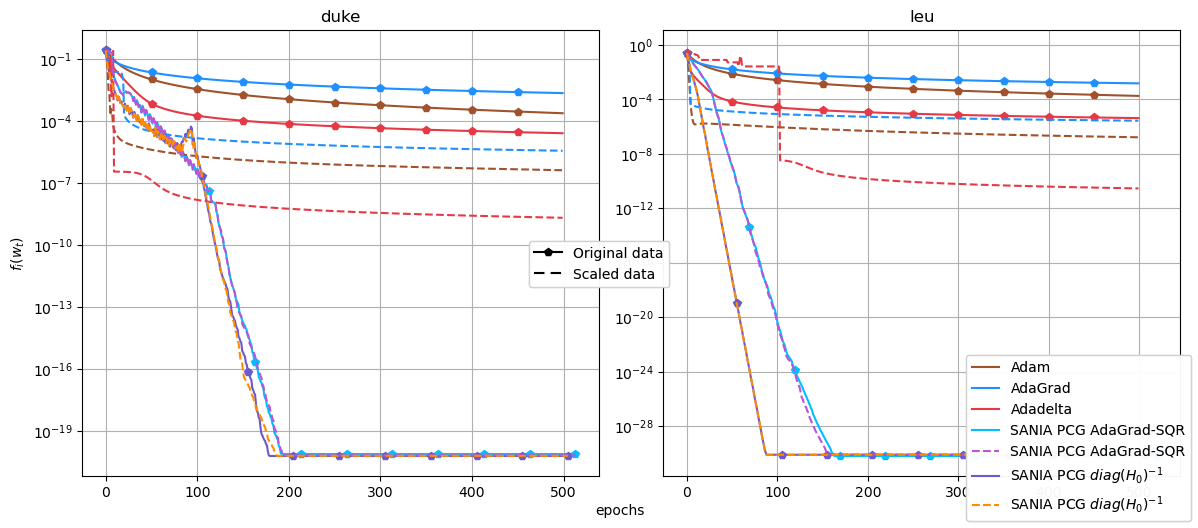

In [278]:
epochs = 500

axis_num = 2
fig, ax = plt.subplots(1, axis_num, figsize=(12, 5))

datasets = ["duke", "leu"]
dataset_scale = 6
loss = "nllsq"

lr_pow_dict = {

    "synthetic-classification-1000x1000-6-500-200-adam-nllsq": -6, # -8
    "synthetic-classification-1000x1000-6-500-200-adagrad-nllsq": -6, # -4
    "synthetic-classification-1000x1000-6-500-200-adadelta-nllsq": -4, # -4
     
    "colon-cancer-6-500-16-adam-nllsq": -10,
    "colon-cancer-6-500-16-adagrad-nllsq": -6,
    "colon-cancer-6-500-16-adadelta-nllsq": -2,
    
    "duke-6-500-16-adam-nllsq": -14,
    "duke-6-500-16-adagrad-nllsq": -12,
    "duke-6-500-16-adadelta-nllsq": -4,

    "leu-6-500-16-adam-nllsq": -14,
    "leu-6-500-16-adagrad-nllsq": -12,
    "leu-6-500-16-adadelta-nllsq": -2,
   
}

for axis, dataset_name, batch_size in zip(range(axis_num), datasets, [16, 16]):

    for scale in [0, dataset_scale]:

        for opt in ["adam", "adagrad", "adadelta"]:

            study_name = f"{dataset_name}-{dataset_scale}-{epochs}-{batch_size}-{opt}-{loss}"
            # storage_name = f"sqlite:///experiments/optuna/{study_name}.db"
            # study = optuna.load_study(study_name=study_name, storage=storage_name)
            # lr = study.best_params["lr"]

            lr = 2**lr_pow_dict.get(study_name)

            results = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, loss, opt, lr, "none", "none", 1000, seed)["loss"]
                results.append(res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[opt] 

            if scale > 0:
                marker = ""
                linestyle = "--"
                # color = methods_palette[opt + "_scaled"]
    

            label = methods_gov_name[opt] + r" lr=$2^{-6}$"

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)



        for method, pcg_method in zip(["pcg", "pcg"], ["adagrad", "hess_diag"]):
            results = []
            cg_steps = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, loss, "psps2", 1.0, method, pcg_method, 1000, seed)
                loss_res = res["loss"]
                results.append(loss_res)
                if method == "pcg":
                    cg_res = res["cg_steps"]
                    cg_steps.append(cg_res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            if method == "pcg":
                cg_mean_line = np.mean(cg_steps, axis=0)
                x = np.rint(cg_mean_line / np.ceil(get_ds_size[dataset_name][0] / batch_size))
            else:
                x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
            
            
            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[f"psps2_{method}_{pcg_method}"]

            if scale > 0:
                marker = ""
                linestyle = "--"
                color = methods_palette[f"psps2_{method}_{pcg_method}_scaled"]


            label = methods_gov_name[f"psps2_{method}_{pcg_method}"]

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"]),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"]),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"]),

                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad"], label=methods_gov_name["psps2_pcg_adagrad"]),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad_scaled"], linestyle="--", label=methods_gov_name["psps2_pcg_adagrad"]),
                
                    Line2D([0], [0], color=methods_palette["psps2_pcg_hess_diag"], label=methods_gov_name["psps2_pcg_hess_diag"]),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_hess_diag_scaled"], linestyle="--", label=methods_gov_name["psps2_pcg_hess_diag"]),

                    ]

legend1 = fig.legend(handles=legend1_elements, loc="lower right")
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='center')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
fig.text(0.5, 0.0, "epochs")

fig.tight_layout()

# ax[0].set_ylim(bottom=1e-10)
# ax[1].set_ylim(bottom=1e-10)

for ax_id, dataset_name in zip(range(axis_num), datasets):
    ax[ax_id].set_title(dataset_name)
    ax[ax_id].grid()

fig.savefig("experiments/plots/exp_nonconvex.pdf", format="pdf")

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'NoneType'

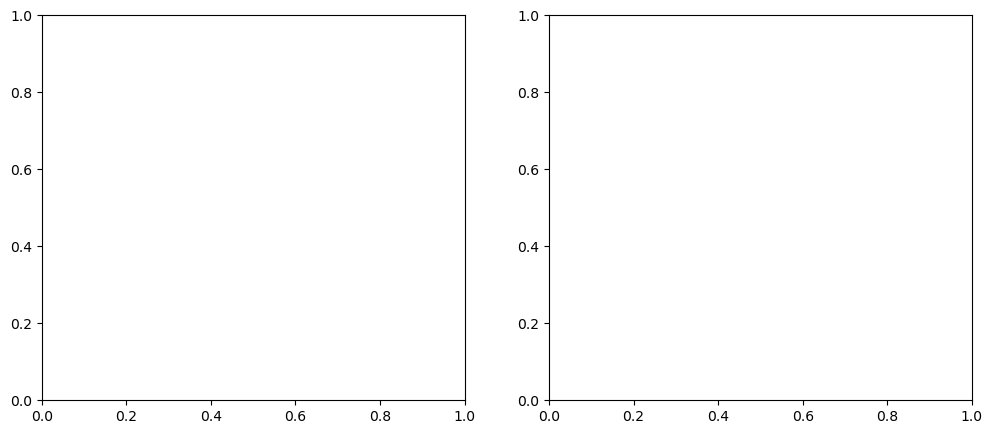

In [11]:
epochs = 500

axis_num = 2
fig, ax = plt.subplots(1, axis_num, figsize=(12, 5))

datasets = ["duke", "leu"]
dataset_scale = 6
loss = "logreg"

lr_pow_dict = {

    "synthetic-classification-1000x1000-6-500-200-adam-nllsq": -6, # -8
    "synthetic-classification-1000x1000-6-500-200-adagrad-nllsq": -6, # -4
    "synthetic-classification-1000x1000-6-500-200-adadelta-nllsq": -4, # -4
     
    "colon-cancer-6-500-16-adam-nllsq": -10,
    "colon-cancer-6-500-16-adagrad-nllsq": -6,
    "colon-cancer-6-500-16-adadelta-nllsq": -2,
    
    "duke-6-500-16-adam-nllsq": -14,
    "duke-6-500-16-adagrad-nllsq": -12,
    "duke-6-500-16-adadelta-nllsq": -4,

    "leu-6-500-16-adam-nllsq": -14,
    "leu-6-500-16-adagrad-nllsq": -12,
    "leu-6-500-16-adadelta-nllsq": -2,
   
}

for axis, dataset_name, batch_size in zip(range(axis_num), datasets, [16, 16]):

    for scale in [0, dataset_scale]:

        for opt in ["adam", "adagrad"]:

            study_name = f"{dataset_name}-{dataset_scale}-{epochs}-{batch_size}-{opt}-{loss}"
            # storage_name = f"sqlite:///experiments/optuna/{study_name}.db"
            # study = optuna.load_study(study_name=study_name, storage=storage_name)
            # lr = study.best_params["lr"]

            lr = 2**lr_pow_dict.get(study_name)

            results = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "nllsq", opt, lr, "none", "none", 1000, seed)["loss"]
                results.append(res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[opt] 

            if scale > 0:
                marker = ""
                linestyle = "--"
                # color = methods_palette[opt + "_scaled"]
    

            label = methods_gov_name[opt] + r" lr=$2^{-6}$"

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)



        for method, pcg_method in zip(["pcg", "adam_m", "adagrad_m"], ["adagrad", "none", "none"]):
            results = []
            for seed in [0, 1, 2, 3, 4]:
                res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "nllsq", "psps2", 1.0, method, pcg_method, 1000, seed)["loss"]
                results.append(res)

            mean_line = np.mean(results, axis=0)
            max_line = np.max(results, axis=0)
            min_line = np.min(results, axis=0)

            x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
            
            markevery = [x for x in range(0, mean_line.shape[0], 50)]
            marker = "p"
            linestyle = "-"
            color = methods_palette[f"psps2_{method}_{pcg_method}"]

            if scale > 0:
                marker = ""
                linestyle = "--"
                color = methods_palette[f"psps2_{method}_{pcg_method}_scaled"]


            label = methods_gov_name[f"psps2_{method}_{pcg_method}"]

            ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color,
                        marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"]),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"]),

                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad"], label=methods_gov_name["psps2_pcg_adagrad"]),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_adagrad_scaled"], linestyle="--", label=methods_gov_name["psps2_pcg_adagrad"]),

                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none_scaled"], linestyle="--", label=methods_gov_name["psps2_adam_m_none"]),

                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none"], label=methods_gov_name["psps2_adagrad_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none_scaled"], linestyle="--", label=methods_gov_name["psps2_adagrad_m_none"]),
                    ]

legend1 = fig.legend(handles=legend1_elements, loc="lower right")
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='center')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
fig.text(0.5, 0.0, "epochs")

# fig.tight_layout()

# ax[0].set_ylim(bottom=1e-10)
# ax[1].set_ylim(bottom=1e-10)

for ax_id, dataset_name in zip(range(axis_num), datasets):
    ax[ax_id].set_title(dataset_name)
    ax[ax_id].grid()

# fig.savefig("plots/rebuttal_nonconvex.pdf", format="pdf")

[6.93147181e-01 2.28850657e-01 6.87325997e-02 2.73965659e-02
 1.42482621e-02 9.00794740e-03 6.26305261e-03 4.73473685e-03
 3.81110222e-03 3.20512267e-03 2.78875167e-03 2.49318953e-03
 2.27650967e-03 2.11217127e-03 1.98308732e-03 1.87810262e-03
 1.78987346e-03 1.71355906e-03 1.64597285e-03 1.58500989e-03
 1.52925940e-03 1.47775038e-03 1.42979147e-03 1.38487321e-03
 1.34260847e-03 1.30269522e-03 1.26489224e-03 1.22900260e-03
 1.19486213e-03 1.16233128e-03 1.13128933e-03 1.10163040e-03
 1.07326043e-03 1.04609511e-03 1.02005828e-03 9.95080770e-04
 9.71099399e-04 9.48056272e-04 9.25898140e-04 9.04575893e-04
 8.84044127e-04 8.64260773e-04 8.45186780e-04 8.26785830e-04
 8.09024100e-04 7.91870040e-04 7.75294179e-04 7.59268958e-04
 7.43768567e-04 7.28768808e-04 7.14246968e-04 7.00181705e-04
 6.86552941e-04 6.73341770e-04 6.60530368e-04 6.48101917e-04
 6.36040533e-04 6.24331196e-04 6.12959698e-04 6.01912577e-04
 5.91177076e-04 5.80741091e-04 5.70593132e-04 5.60722280e-04
 5.51118151e-04 5.417708

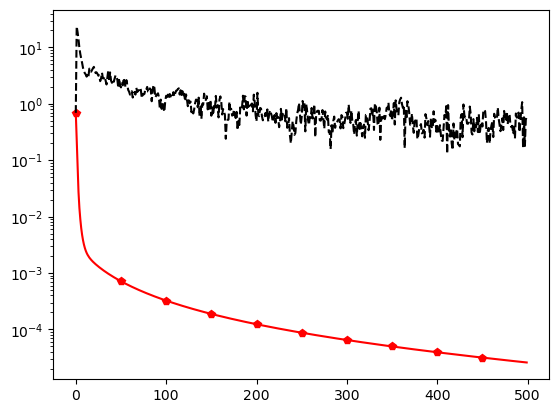

In [670]:
dataset_name, bs = "synthetic-classification-1000x1000", 200
# dataset_name, bs = "colon-cancer", 16

opt = "adam"

for scale in [0, 6]:
    lr_pow = -4
    lr = 2**lr_pow
    results = []
    for seed in [0, 1, 2, 3, 4]:
        res = load_results(dataset_name, 1.0, scale, bs, 500, "logreg", opt, lr, "none", "none", 1000, seed)["loss"]
        results.append(res)

    mean_line = np.mean(results, axis=0)
    max_line = np.max(results, axis=0)
    min_line = np.min(results, axis=0)

    print(mean_line)

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

    markevery = [x for x in range(0, mean_line.shape[0], 50)]
    marker = "p"
    linestyle = "-"
    color = "red"

    if scale > 0:
        marker = ""
        linestyle = "--"
        color = "black"

    label = methods_gov_name[opt] + f"lr=2^{lr_pow}$"

    plt.fill_between(x, max_line, min_line, alpha=0.2) 
    plt.semilogy(x, mean_line, linestyle=linestyle, color=color,
                marker=marker, markevery=markevery)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


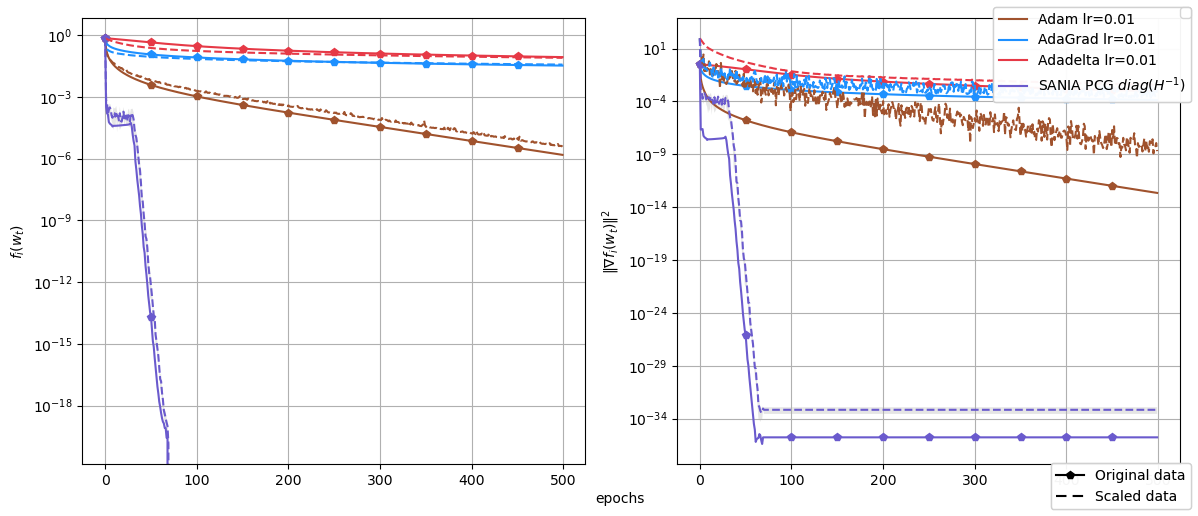

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

dataset_name = "mushrooms"
batch_size = 256
epochs = 500


for scale in [0, 5]:

    for opt in ["adam", "adagrad", "adadelta"]:

        # lr_pow = -4
        lr = 0.01

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", opt, lr, "none", "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])
            

        mean_line = np.mean(losses, axis=0)
        max_line = np.max(losses, axis=0)
        min_line = np.min(losses, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"
        linestyle = "-"
        color = methods_palette[opt]

        if scale > 0:
            marker = ""
            linestyle = "--"
            # color = methods_palette[f"{opt}_scaled"]
            

        label = methods_gov_name[opt] + r" lr=$2^{-4}$"

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        


        mean_line = np.mean(gnorms, axis=0)
        max_line = np.max(gnorms, axis=0)
        min_line = np.min(gnorms, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        




    for method, pcg_method in zip(["pcg"], ["hess_diag"]):

        losses = []
        gnorms = []
        for seed in [0, 1, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, method, pcg_method, 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])

        mean_line = np.mean(losses, axis=0)
        max_line = np.max(losses, axis=0)
        min_line = np.min(losses, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"

        linestyle = "-"
        if scale > 0:
            marker = ""
            linestyle = "--"

        
        
        color = methods_palette[f"psps2_{method}_{pcg_method}"]

        # if precond == "true_hessian" and scale > 0:
        #     color = "lime"

        label = methods_gov_name[f"psps2_{method}_{pcg_method}"]

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        

        mean_line = np.mean(gnorms, axis=0)
        max_line = np.max(gnorms, axis=0)
        min_line = np.min(gnorms, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"] + f" {lr=}"),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"] + f" {lr=}"),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"] + f" {lr=}"),
                    
                    # Line2D([0], [0], linestyle="--", color=methods_palette["adam_scaled"], label=methods_gov_name["adam"] + f" {lr=}"),
                    # Line2D([0], [0], linestyle="--", color=methods_palette["adagrad_scaled"], label=methods_gov_name["adagrad"] + f" {lr=}"),
                    # Line2D([0], [0], linestyle="--", color=methods_palette["adadelta_scaled"], label=methods_gov_name["adadelta"] + f" {lr=}"),

                    Line2D([0], [0], color=methods_palette["psps2_pcg_hess_diag"], label=methods_gov_name["psps2_pcg_hess_diag"]),
                    # Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),                     
                    # Line2D([0], [0], color=methods_palette["psps2_pcg_none"], label=methods_gov_name["psps2_pcg_none"]),
                    # Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),
                    # Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none"], label=methods_gov_name["psps2_adagrad_m_none"]),  
                    # Line2D([0], [0], linestyle="--", color="olive", label=methods_gov_name["psps2_adam_m_none"]), 
                    # Line2D([0], [0], color=methods_palette["psps2_hutch_none"], label=methods_gov_name["psps2_hutch_none"]),  
                    ]

legend1 = fig.legend(handles=legend1_elements)
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='lower right')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
ax[1].set_ylabel(r"$\|\nabla f_i(w_t)\|^2$")

# fig.text(0.5, 1.0, dataset_name)
fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()

ax[0].grid()
ax[1].grid()

# ax[0].set_ylim(bottom=1e-3)
# ax[1].set_ylim(bottom=1e-5)


# fig.savefig(f"experiments/plots/sania_hess_diag_exp_{dataset_name}-bs_{batch_size}-epochs_{epochs}-loss_logreg.pdf", format="pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


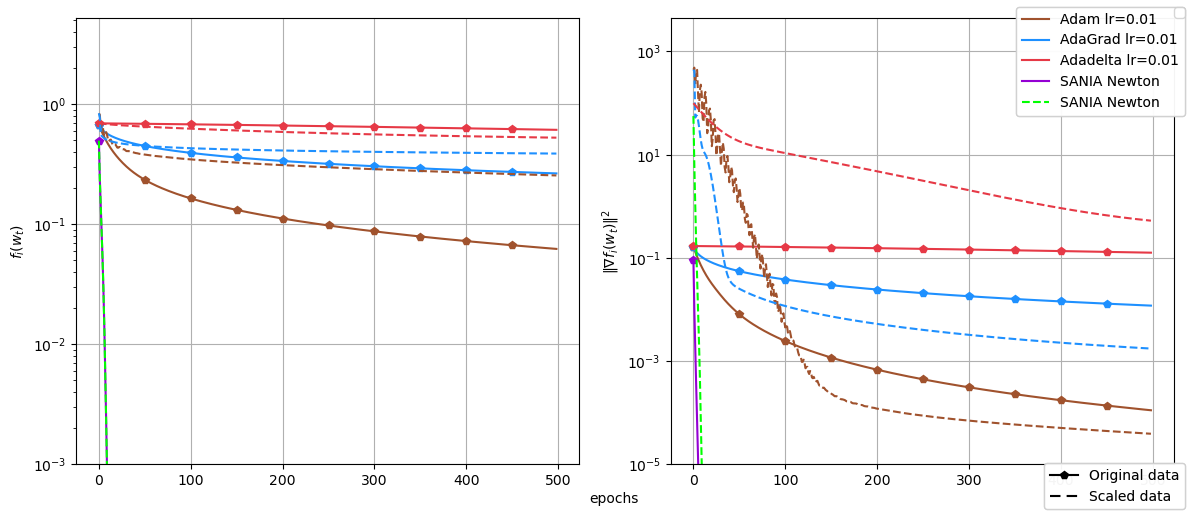

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

dataset_name = "synthetic-classification-1000x100"
batch_size = 1000
epochs = 500


for scale in [0, 5]:

    for opt in ["adam", "adagrad", "adadelta"]:

        # lr_pow = -2
        lr = 0.01

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", opt, lr, "none", "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])
            

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"
        linestyle = "-"
        color = methods_palette[opt]

        if scale > 0:
            marker = ""
            linestyle = "--"    
            

        label = methods_gov_name[opt] + r" lr=$2^{-4}$"

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        


        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        




    for precond in ["true_hessian"]:

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"

        linestyle = "-"
        if scale > 0:
            marker = ""
            linestyle = "--"

        
        
        color = methods_palette[f"psps2_{precond}_none"]

        if precond == "true_hessian" and scale > 0:
            color = "lime"

        label = methods_gov_name[f"psps2_{precond}_none"]

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        

        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"] + f" {lr=}"),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"] + f" {lr=}"),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"] + f" {lr=}"),
                    Line2D([0], [0], color=methods_palette["psps2_true_hessian_none"], label=methods_gov_name["psps2_true_hessian_none"]),
                    Line2D([0], [0], linestyle="--", color="lime", label=methods_gov_name["psps2_true_hessian_none"]),
                     
                    # Line2D([0], [0], color=methods_palette["psps2_pcg_none"], label=methods_gov_name["psps2_pcg_none"]),
                    # Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),
                    # Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none"], label=methods_gov_name["psps2_adagrad_m_none"]),  
                    # Line2D([0], [0], linestyle="--", color="olive", label=methods_gov_name["psps2_adam_m_none"]), 
                    # Line2D([0], [0], color=methods_palette["psps2_hutch_none"], label=methods_gov_name["psps2_hutch_none"]),  
                    ]

legend1 = fig.legend(handles=legend1_elements)
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='lower right')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
ax[1].set_ylabel(r"$\|\nabla f_i(w_t)\|^2$")

# fig.text(0.5, 1.0, dataset_name)
fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()

ax[0].grid()
ax[1].grid()

ax[0].set_ylim(bottom=1e-3)
ax[1].set_ylim(bottom=1e-5)


# fig.savefig(f"experiments/plots/sania_newton_exp_{dataset_name}-bs_{batch_size}-epochs_{epochs}.pdf", format="pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


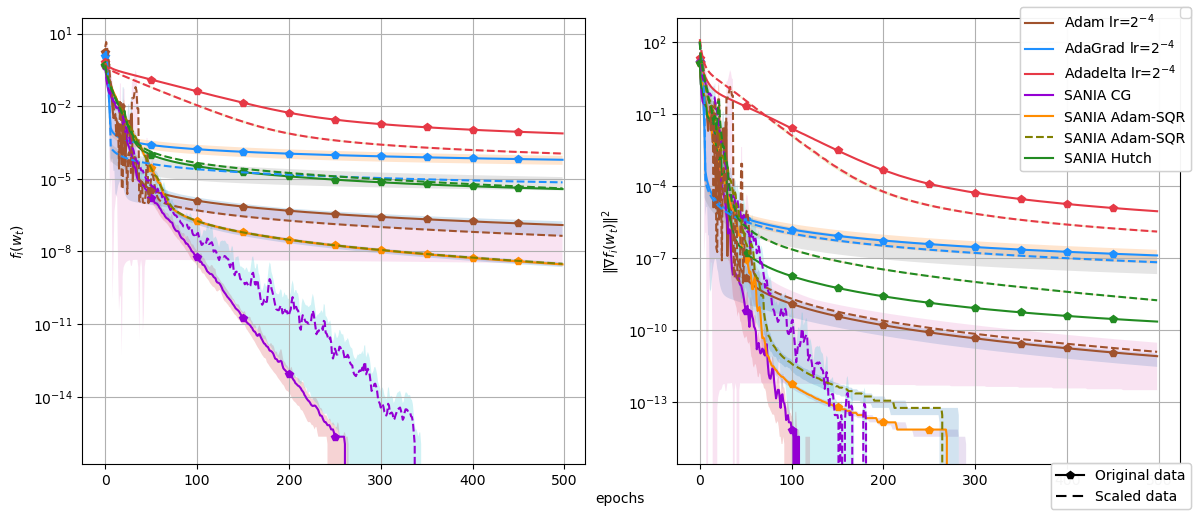

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

dataset_name = "colon-cancer"
batch_size = 16
epochs = 500


for scale in [0, 2]:

    for opt in ["adam", "adagrad", "adadelta"]:

        lr_pow = -4
        lr = 2**lr_pow

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", opt, lr, "none", "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])
            

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"
        linestyle = "-"
        color = methods_palette[opt]

        if scale > 0:
            marker = ""
            linestyle = "--"    
            

        label = methods_gov_name[opt] + r" lr=$2^{-4}$"

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        


        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        




    for precond in ["pcg", "adam_m", "hutch"]:

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"

        linestyle = "-"
        if scale > 0:
            marker = ""
            linestyle = "--"

        
        
        color = methods_palette[f"psps2_{precond}_none"]

        if precond == "adam_m" and scale > 0:
            color = "olive"

        label = methods_gov_name[f"psps2_{precond}_none"]

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        

        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"] + r" lr=$2^{-4}$"),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"] + r" lr=$2^{-4}$"),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"] + r" lr=$2^{-4}$"),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_none"], label=methods_gov_name["psps2_pcg_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]), 
                    Line2D([0], [0], linestyle="--", color="olive", label=methods_gov_name["psps2_adam_m_none"]), 
                    Line2D([0], [0], color=methods_palette["psps2_hutch_none"], label=methods_gov_name["psps2_hutch_none"]),  
                    ]

legend1 = fig.legend(handles=legend1_elements)
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='lower right')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
ax[1].set_ylabel(r"$\|\nabla f_i(w_t)\|^2$")

# fig.text(0.5, 1.0, dataset_name)
fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()
ax[0].grid()
ax[1].grid()

# fig.savefig(f"experiments/plots/exp_colon-cancer-bs_{batch_size}-epochs_{epochs}.pdf", format="pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


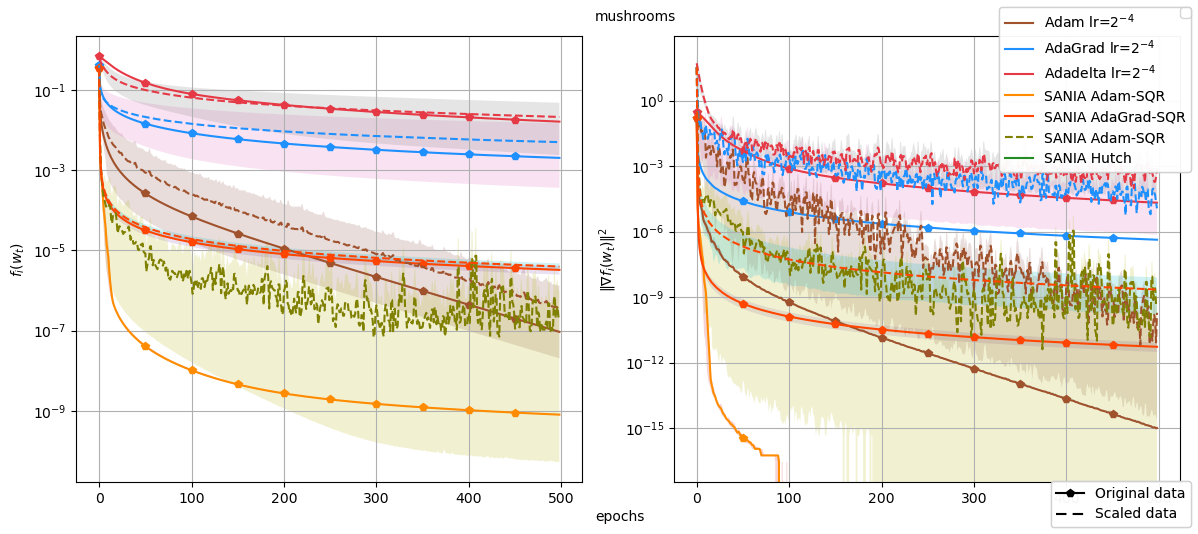

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

dataset_name = "mushrooms"
batch_size = 256
epochs = 500


for scale in [0, 4]:

    for opt in ["adam", "adagrad", "adadelta"]:

        lr_pow = -2
        lr = 2**lr_pow

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", opt, lr, "none", "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])
            

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"
        linestyle = "-"
        color = methods_palette[opt]

        if scale > 0:
            marker = ""
            linestyle = "--"    
            

        label = methods_gov_name[opt] + r" lr=$2^{-4}$"

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        


        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        




    for precond in ["adam_m", "adagrad_m"]:

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"

        linestyle = "-"
        if scale > 0:
            marker = ""
            linestyle = "--"

        
        
        color = methods_palette[f"psps2_{precond}_none"]

        if precond == "adam_m" and scale > 0:
            color = "olive"

        label = methods_gov_name[f"psps2_{precond}_none"]

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        

        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"] + r" lr=$2^{-4}$"),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"] + r" lr=$2^{-4}$"),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"] + r" lr=$2^{-4}$"),
                    # Line2D([0], [0], color=methods_palette["psps2_pcg_none"], label=methods_gov_name["psps2_pcg_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adam_m_none"], label=methods_gov_name["psps2_adam_m_none"]),
                    Line2D([0], [0], color=methods_palette["psps2_adagrad_m_none"], label=methods_gov_name["psps2_adagrad_m_none"]),  
                    Line2D([0], [0], linestyle="--", color="olive", label=methods_gov_name["psps2_adam_m_none"]), 
                    Line2D([0], [0], color=methods_palette["psps2_hutch_none"], label=methods_gov_name["psps2_hutch_none"]),  
                    ]

legend1 = fig.legend(handles=legend1_elements)
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='lower right')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
ax[1].set_ylabel(r"$\|\nabla f_i(w_t)\|^2$")

fig.text(0.5, 1.0, dataset_name)
fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()

ax[0].grid()
ax[1].grid()

# fig.savefig(f"experiments/plots/exp_{dataset_name}-bs_{batch_size}-epochs_{epochs}.pdf", format="pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


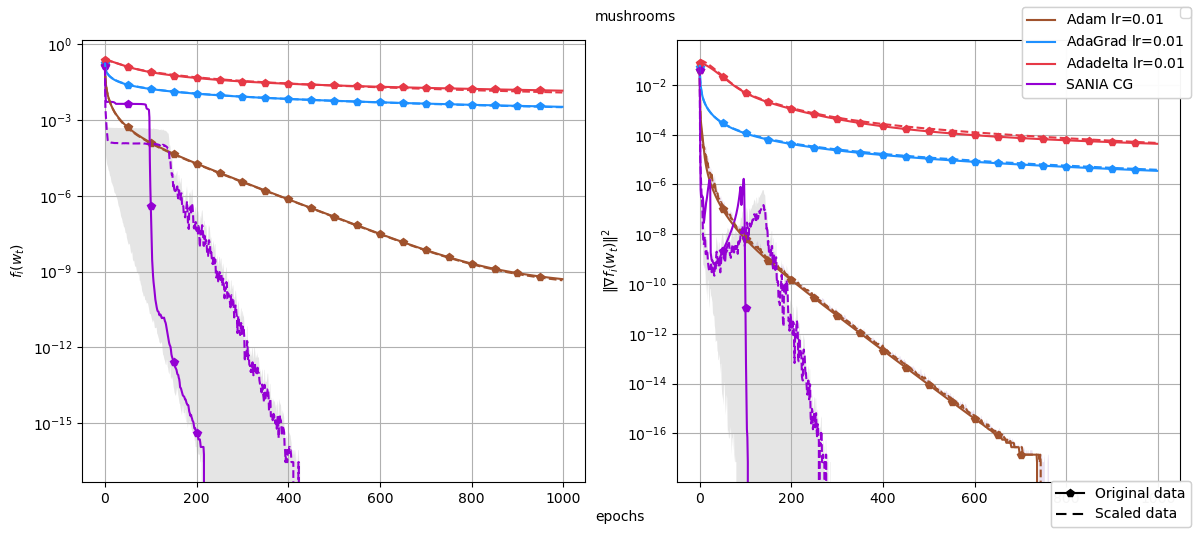

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

dataset_name = "mushrooms"
batch_size = 256
epochs = 1000


for scale in [0, 1]:

    for opt in ["adam", "adagrad", "adadelta"]:

        lr = 0.01

        losses = []
        gnorms = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "nllsq", opt, lr, "none", "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])
            

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"
        linestyle = "-"
        color = methods_palette[opt]

        if scale > 0:
            marker = ""
            linestyle = "--"    
            

        label = methods_gov_name[opt] + r" lr=$2^{-4}$"

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        


        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        




    for precond in ["pcg"]:

        losses = []
        gnorms = []
        for seed in [0, 1, 3, 7]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "nllsq", "psps2", 1.0, precond, "none", 1000, seed)
            losses.append(res["loss"])
            gnorms.append(res["grad_norm_sq"])

        mean_line = moving_average(np.mean(losses, axis=0))
        max_line = moving_average(np.max(losses, axis=0))
        min_line = moving_average(np.min(losses, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        markevery = [x for x in range(0, mean_line.shape[0], 50)]
        marker = "p"

        linestyle = "-"
        if scale > 0:
            marker = ""
            linestyle = "--"

        
        
        color = methods_palette[f"psps2_{precond}_none"]

        if precond == "adam_m" and scale > 0:
            color = "olive"

        label = methods_gov_name[f"psps2_{precond}_none"]

        ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
        

        mean_line = moving_average(np.mean(gnorms, axis=0))
        max_line = moving_average(np.max(gnorms, axis=0))
        min_line = moving_average(np.min(gnorms, axis=0))

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        
        ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
        ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color,
                    marker=marker, markevery=markevery)
            



from matplotlib.lines import Line2D

legend1_elements = [Line2D([0], [0], color=methods_palette["adam"], label=methods_gov_name["adam"] + r" lr=$0.01$"),
                    Line2D([0], [0], color=methods_palette["adagrad"], label=methods_gov_name["adagrad"] + r" lr=$0.01$"),
                    Line2D([0], [0], color=methods_palette["adadelta"], label=methods_gov_name["adadelta"] + r" lr=$0.01$"),
                    Line2D([0], [0], color=methods_palette["psps2_pcg_none"], label=methods_gov_name["psps2_pcg_none"]),
                    ]

legend1 = fig.legend(handles=legend1_elements)
fig.gca().add_artist(legend1)

legend2_elements = [Line2D([0], [0], marker="p", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend2_elements, loc='lower right')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w_t)$")
ax[1].set_ylabel(r"$\|\nabla f_i(w_t)\|^2$")

fig.text(0.5, 1.0, dataset_name)
fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()

ax[0].grid()
ax[1].grid()

fig.savefig(f"experiments/plots/exp_nllsq_{dataset_name}-bs_{batch_size}-epochs_{epochs}.pdf", format="pdf")

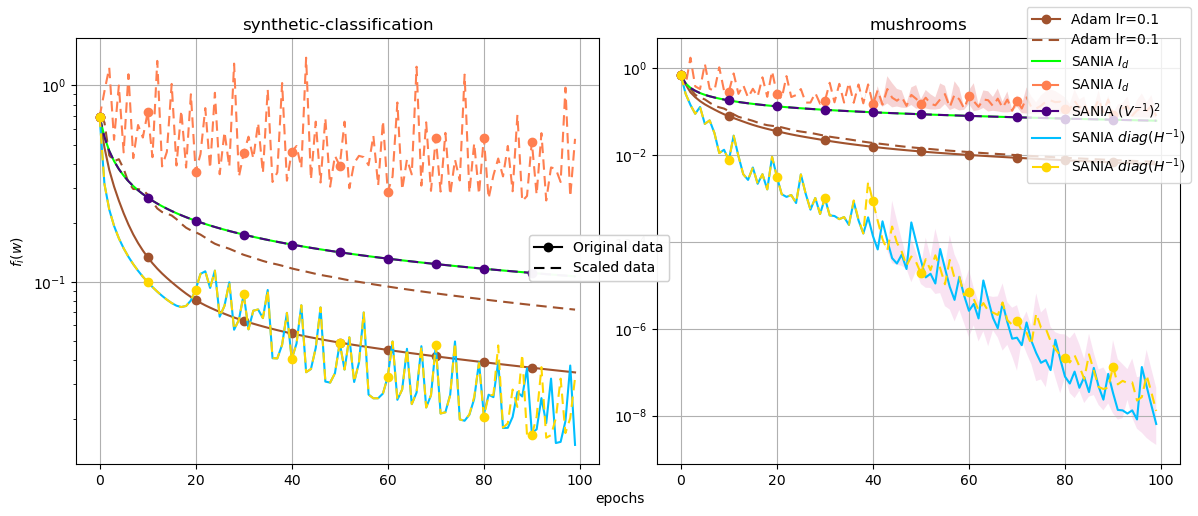

In [1394]:
colors = {
    "psps2_none": "lime",
    "psps2_none_scaled": "coral",
    
    "psps2_scaling_vec_scaled": "indigo",
    "psps2_hess_diag": "deepskyblue",
    "psps2_hess_diag_scaled": "gold",

    "adam": "sienna",
    # "adam_scaled": "darkorange",

    "adagrad": "navy",
    # "adagrad_scaled": "violet",

}

seeds = [0, 1, 2, 3, 4]

dataset_name = "synthetic-classification-1000x100"
batch_size = 1000
epochs = 100

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for dataset_name, batch_size, axis, print_label in zip(["synthetic-classification-1000x100", "mushrooms"], [1000, 8124], [0, 1], [1, 0]):

    for opt, scale in zip(["adam", "adam"], [0, 2, 0, 2]):
        lr = 0.1

        results = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", opt, lr, "none", "none", 1000, seed)["loss"]
            results.append(res)

        mean_line = np.mean(results, axis=0)
        max_line = np.max(results, axis=0)
        min_line = np.min(results, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        markevery = [x for x in range(0, mean_line.shape[0], 10)]
        marker = "o"
        linestyle = "-"

        if scale > 0:
            linestyle = (0, (5, 3))
            color = colors[f"{opt}"]
            marker = ""
        else:
            color = colors[opt]

        
        label = f"{methods_gov_name[opt]} lr={lr}"

        ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
        if print_label:
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color, label=label, 
                        marker=marker, markevery=markevery)
        else:
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color, 
                        marker=marker, markevery=markevery)




    for precond, scale in zip(["none", "none", "scaling_vec", "hess_diag", "hess_diag"], [0, 2, 2, 0, 2]):

        results = []
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, scale, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)["loss"]
            results.append(res)

        mean_line = np.mean(results, axis=0)
        max_line = np.max(results, axis=0)
        min_line = np.min(results, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

        linestyle = "-"
        
        markevery = [x for x in range(0, mean_line.shape[0], 10)]
        marker = ""

        label = methods_gov_name[f"psps2_{precond}"]
        if scale > 0:
            linestyle = (0, (5, 3))
            marker = "o"
            color = colors[f"psps2_{precond}_scaled"]
        else:
            color = colors[f"psps2_{precond}"]

        ax[axis].fill_between(x, max_line, min_line, alpha=0.2) 
        if print_label:
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color, label=label, 
                        marker=marker, markevery=markevery)
        else:
            ax[axis].semilogy(x, mean_line, linestyle=linestyle, color=color, 
                        marker=marker, markevery=markevery)
            







from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker="o", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle=(0, (5, 3)),  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend_elements, loc='center')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w)$")

ax[0].set_title("synthetic-classification")
ax[1].set_title("mushrooms")

fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()

ax[0].grid()
ax[1].grid()

# fig.savefig("experiments/plots/scalingvec_hessdiag_synthetic_vs_mushrooms.pdf", format="pdf")

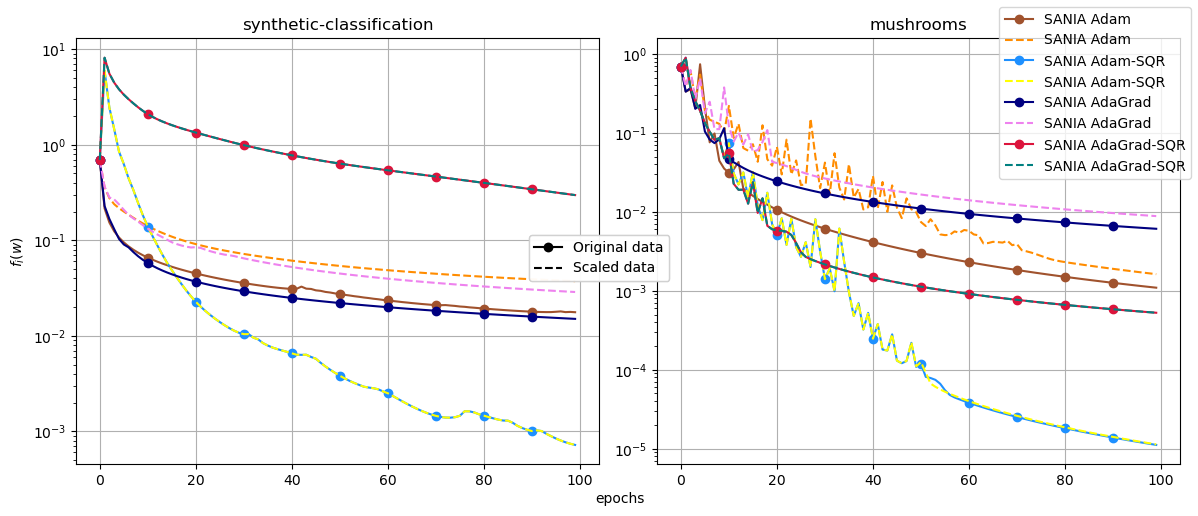

In [954]:
colors = {

    "adam": "sienna",
    "adam_scaled": "darkorange",
    "adam_m": "dodgerblue",
    "adam_m_scaled": "yellow",

    "adagrad": "navy",
    "adagrad_scaled": "violet",
    "adagrad_m": "crimson",
    "adagrad_m_scaled": "teal",

}

seeds = [0, 1, 2, 3, 4]

dataset_name = "synthetic-classification-1000x100"
batch_size = 50
epochs = 100

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for precond in ["adam", "adam_m", "adagrad", "adagrad_m"]:

    results = []
    for seed in [0, 1, 2, 3, 4]:
        res = load_results(dataset_name, 1.0, 0, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)["loss"]
        results.append(res)

    mean_line = moving_average(np.mean(results, axis=0))
    mean_line = np.mean(results, axis=0)
    max_line = moving_average(np.max(results, axis=0))
    min_line = moving_average(np.min(results, axis=0))

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

    linestyle = "-"
    color = colors[precond]

    markevery = [x for x in range(0, mean_line.shape[0], 10)]
    
    label = methods_gov_name[f"psps2_{precond}_none"]

    # ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
    ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color, label=label, 
                   marker="o", markevery=markevery)


    results = []
    for seed in [0, 1, 2, 3, 4]:
        res = load_results(dataset_name, 1.0, 2, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)["loss"]
        results.append(res)

    mean_line = moving_average(np.mean(results, axis=0))
    mean_line = np.mean(results, axis=0)
    max_line = moving_average(np.max(results, axis=0))
    min_line = moving_average(np.min(results, axis=0))

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

    linestyle = "--"
    color = colors[precond + "_scaled"]

    label = methods_gov_name[f"psps2_{precond}_none"]

    # ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
    ax[0].semilogy(x, mean_line, linestyle=linestyle, color=color, label=label)




dataset_name = "mushrooms"
batch_size = 8124

for precond in ["adam", "adam_m", "adagrad", "adagrad_m"]:

    results = []
    for seed in [0, 1, 2, 3, 4]:
        res = load_results(dataset_name, 1.0, 0, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)["loss"]
        results.append(res)

    mean_line = moving_average(np.mean(results, axis=0))
    mean_line = np.mean(results, axis=0)
    max_line = moving_average(np.max(results, axis=0))
    min_line = moving_average(np.min(results, axis=0))

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

    linestyle = "-"
    color = colors[precond]
    markevery = [x for x in range(0, mean_line.shape[0], 10)]
    
    # ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
    ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color, 
                   marker="o", markevery=markevery)


    results = []
    for seed in [0, 1, 2, 3, 4]:
        res = load_results(dataset_name, 1.0, 2, batch_size, epochs, "logreg", "psps2", 1.0, precond, "none", 1000, seed)["loss"]
        results.append(res)

    mean_line = moving_average(np.mean(results, axis=0))
    mean_line = np.mean(results, axis=0)
    max_line = moving_average(np.max(results, axis=0))
    min_line = moving_average(np.min(results, axis=0))

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

    linestyle = "--"
    color = colors[precond + "_scaled"]

    # ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
    ax[1].semilogy(x, mean_line, linestyle=linestyle, color=color)









from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker="o", linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle="--",  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend_elements, loc='center')
fig.gca().add_artist(legend2)


ax[0].set_ylabel(r"$f_i(w)$")

ax[0].set_title("synthetic-classification")
ax[1].set_title("mushrooms")

fig.text(0.5, 0.0, "epochs")

fig.legend()
fig.tight_layout()

ax[0].grid()
ax[1].grid()

fig.savefig("experiments/plots/sania_preconds_invariance_synthetic_vs_mushrooms.pdf", format="pdf")

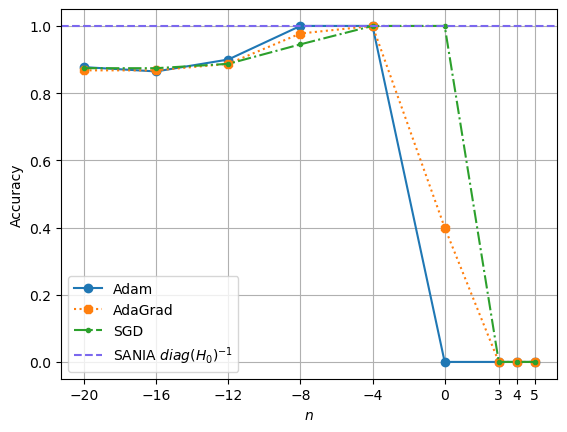

In [266]:
lrs = [2**x for x in range(-20, 4, 4)] + [2**x for x in range(3, 6)]
scales = [0, 2, 4, 6, 8]
seeds = [0, 1, 2, 3, 4]

dataset_name = "colon-cancer"
batch_size = 16

fig, ax = plt.subplots()

for optimizer, marker, linestyle in zip(["adam", "adagrad", "sgd"], ["o", "8", "."], ["solid", "dotted", "dashdot"]):

    results = []
    for lr in lrs:
        s = 0
        for seed in [0, 1, 2, 3, 4]:
            res = load_results(dataset_name, 1.0, 0, batch_size, 500, "logreg", optimizer, lr, "none", "none", 1000, seed)["acc"][:10]
            s += res[-1].item()
        s = s / 5
        results.append(s)

    markevery = [x for x in range(-20, 4, 4)] + [x for x in range(3, 6)]
    ax.plot([x for x in range(-20, 4, 4)] + [x for x in range(3, 6)], results, 
            marker=marker,
            linestyle=linestyle,
            label=methods_gov_name[optimizer])

ax.set_xticks([x for x in range(-20, 4, 4)] + [x for x in range(3, 6)])


hist_psps2 = load_results(dataset_name, 1.0, 0, batch_size, 500, "logreg", "psps2", 1.0, "hess_diag", "none", 1000, seed)["acc"][:10][-1].item()

plt.axhline(y = hist_psps2, linestyle = '--', label=methods_gov_name["psps2_hess_diag_none"], color=methods_palette["psps2_hess_diag_none"]) 


plt.legend()

ax.set_ylabel("Accuracy")
ax.set_xlabel(r"$n$")

plt.grid()

fig.savefig(f"experiments/plots/sania_different_lrs.pdf", format="pdf")

In [267]:
[x for x in range(-20, 4, 4)] + [x for x in range(3, 6)]

[-20, -16, -12, -8, -4, 0, 3, 4, 5]

In [496]:
for x in range(-20, -5, 2):
    print(2**x)

9.5367431640625e-07
3.814697265625e-06
1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625


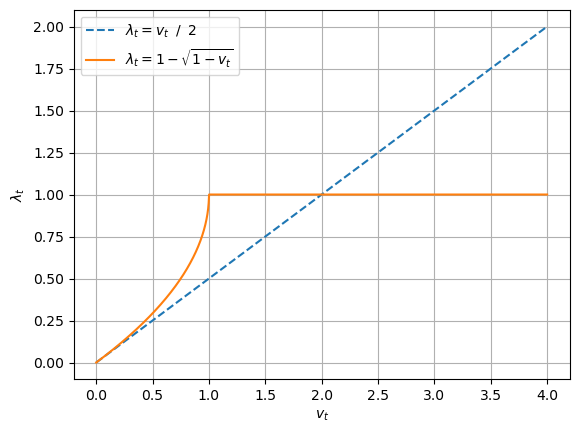

In [296]:
func1 = lambda x: x/2
func2 = lambda x: 1 - np.sqrt(1 - x)

x = np.linspace(0, 4, 10000)
y1 = func1(x)
y2 = np.asarray([func2(x) if x <= 1 else 1 for x in x])

plt.plot(x, y1, linestyle="--", label=r"$\lambda_t = v_t \;\; / \;\; 2$")
plt.plot(x, y2, label=r"$\lambda_t =  1 - \sqrt{1 - v_t}$")

plt.ylabel(r"$\lambda_t$")
plt.xlabel(r"$v_t$")

plt.legend()
plt.grid(True)

plt.savefig(f"experiments/plots/vt_comparison.pdf", format="pdf")

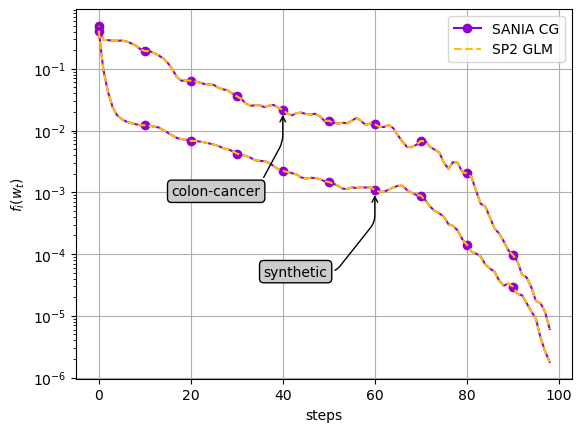

In [24]:
results = []
for seed in [0, 1, 2]:
    res = load_results("colon-cancer", 1.0, 0, 1, 100, "logreg", "psps2", 1.0, "pcg", "none", 1000, seed)["loss"]
    results.append(res)

mean_line = moving_average(np.mean(results, axis=0))
max_line = moving_average(np.max(results, axis=0))
min_line = moving_average(np.min(results, axis=0))

x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

color = methods_palette[f"psps2_pcg_none"]
label = methods_gov_name[f"psps2_pcg_none"]

plt.fill_between(x, max_line, min_line, alpha=0.2) 

markevery = [x for x in range(0, mean_line.shape[0], 10)]
plt.semilogy(x, mean_line, linestyle="-", color=color, label=label, marker="o", markevery=markevery)



results = []
for seed in [0, 1, 2]:
    res = load_results("colon-cancer", 1.0, 0, 1, 100, "logreg", "sp2_glm", 1.0, "none", "none", 1000, seed)["loss"]
    results.append(res)

mean_line = moving_average(np.mean(results, axis=0))
max_line = moving_average(np.max(results, axis=0))
min_line = moving_average(np.min(results, axis=0))

x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

color = methods_palette["sp2_glm"]
label = methods_gov_name[f"sp2_glm"]

plt.fill_between(x, max_line, min_line, alpha=0.2) 
plt.semilogy(x, mean_line, linestyle="--", color=color, label=label)





results = []
for seed in [0, 1, 2]:
    res = load_results("synthetic-classification_100x100", 1.0, 0, 1, 100, "logreg", "psps2", 1.0, "pcg", "none", 1000, seed)["loss"]
    results.append(res)

mean_line = moving_average(np.mean(results, axis=0))
max_line = moving_average(np.max(results, axis=0))
min_line = moving_average(np.min(results, axis=0))

x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

color = methods_palette[f"psps2_pcg_none"]
label = methods_gov_name[f"psps2_pcg_none"]

plt.fill_between(x, max_line, min_line, alpha=0.2)

markevery = [x for x in range(0, mean_line.shape[0], 10)]
plt.semilogy(x, mean_line, linestyle="-", color=color, marker="o", markevery=markevery)



results = []
for seed in [0, 1, 2]:
    res = load_results("synthetic-classification_100x100", 1.0, 0, 1, 100, "logreg", "sp2_glm", 1.0, "none", "none", 1000, seed)["loss"]
    results.append(res)

mean_line = moving_average(np.mean(results, axis=0))
max_line = moving_average(np.max(results, axis=0))
min_line = moving_average(np.min(results, axis=0))

x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

color = methods_palette["sp2_glm"]
label = methods_gov_name[f"sp2_glm"]

plt.fill_between(x, max_line, min_line, alpha=0.2) 
plt.semilogy(x, mean_line, linestyle="--", color=color)

plt.annotate(
    'colon-cancer',
    xy=(40, 0.02), xycoords='data',
    xytext=(-80, -60), textcoords='offset points',
    bbox=dict(boxstyle="round", fc="0.8"),
    color="k",
    arrowprops=dict(
        color="k",
        arrowstyle="->",
        connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))


plt.annotate(
    'synthetic',
    xy=(60, 0.001), xycoords='data',
    xytext=(-80, -60), textcoords='offset points',
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(
        color="k",
        arrowstyle="->",
        connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))

plt.ylabel(r"$f_i(w_t)$")
plt.xlabel("steps")

plt.legend()

plt.grid()


plt.savefig(f"experiments/plots/sania_vs_sp2glm_colon-cancer_synthetic.pdf", format="pdf")

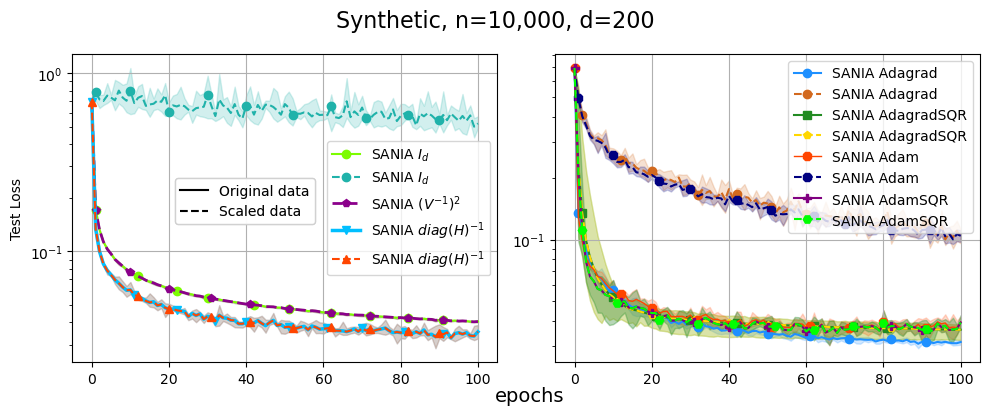

In [29]:
from experiments import utils
from experiments.methods import * 

dataset_name = "binary_classification_synthetic_10000x200"
n_epochs = 100
scale = 4


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Synthetic, n=10,000, d=200", fontsize=16)


precond_methods = ["identity", "identity", "scaling_vec", "hessian_diag", "hessian_diag"]
scales = [0, scale, scale, 0, scale]

labels = [r"SANIA $I_d$", r"SANIA $I_d$", r"SANIA $(V^{-1})^2$", r"SANIA $diag(H)^{-1}$", r"SANIA $diag(H)^{-1}$"]
colors = ["lawngreen", "lightseagreen", "darkmagenta", "deepskyblue", "orangered"]
linestyles = ["-", "--", "--", "-", "--"]
linewidths = [1.5, 1.5, 2.0, 2.5, 1.5]
markers = ["o", "o", "p", "v", "^"]

batch_size = 200
all_histories = []
for precond_method, scale, label, color, linestyle, linewidth, marker in zip(precond_methods, scales, labels, colors, linestyles, linewidths, markers):
    histories = []
    for seed in [0, 1, 2, 3, 4]:
        hist = utils.load_results(dataset_name=dataset_name,
                                model_name="linear",
                                scale=scale,
                                batch_size=batch_size, 
                                n_epochs=n_epochs,
                                optimizer=f"SANIA_{precond_method}",
                                lr=1.0,
                                seed=seed)
        histories.append(hist)
        
    losses = []
    acc = []
    for h in histories:
        losses.append(h[f"test/loss"])
        acc.append(h[f"test/acc"])

    mean_line = np.mean(losses, axis=0)
    max_line = np.max(losses, axis=0)
    min_line = np.min(losses, axis=0)

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
    markevery = [x + np.random.randint(0, 3) for x in range(0, len(mean_line) - 3, len(mean_line) // 10)]

    ax[0].fill_between(x, max_line, min_line, alpha=0.2, color=color) 
    ax[0].semilogy(x, mean_line, linestyle=linestyle, linewidth=linewidth, color=color, label=label, 
            marker=marker, markevery=markevery)
    

batch_size = 20
optimizers = [SANIA_AdagradSQR, SANIA_AdagradSQR, SANIA_AdagradSQR, SANIA_AdagradSQR, SANIA_AdamSQR, SANIA_AdamSQR, SANIA_AdamSQR, SANIA_AdamSQR]
sqrts = [True, True, False, False, True, True, False, False]
scales = [0, scale, 0, scale, 0, scale, 0, scale]

labels = ["SANIA Adagrad", "SANIA Adagrad", "SANIA AdagradSQR", "SANIA AdagradSQR", 
          "SANIA Adam", "SANIA Adam", "SANIA AdamSQR", "SANIA AdamSQR"]
colors = ["dodgerblue", "chocolate", "forestgreen", "gold", "orangered", "navy", "purple", "lime"]
linestyles = ["-", "--", "-", "--", "-", "--", "-", "--"]
linewidths = [1.5, 1.5, 1.5, 1.5, 1.0, 1.5, 1.5, 1.5]
markers = ["o", "o", "s", "p", "8", "8", "P", "H"]

for optimizer, scale, sqrt, label, color, linestyle, linewidth, marker in zip(optimizers, scales, sqrts, labels, colors, linestyles, linewidths, markers):

    if sqrt:
        optimizer_name = optimizer.__name__[:-3]
    else:
        optimizer_name = optimizer.__name__
    
    histories = []
    for seed in [0, 1, 2, 3, 4]:
        hist = utils.load_results(dataset_name=dataset_name,
                                  model_name="linear",
                                  scale=scale,
                                  batch_size=batch_size,
                                  n_epochs=n_epochs, 
                                  optimizer=optimizer_name,
                                  lr=1.0,
                                  seed=seed)
        histories.append(hist)
        
    losses = []
    acc = []
    for h in histories:
        losses.append(h[f"test/loss"])
        acc.append(h[f"test/acc"])

    mean_line = np.mean(losses, axis=0)
    max_line = np.max(losses, axis=0)
    min_line = np.min(losses, axis=0)

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
    markevery = [x + np.random.randint(0, 3) for x in range(0, len(mean_line) - 3, len(mean_line) // 10)]

    ax[1].fill_between(x, max_line, min_line, alpha=0.2, color=color) 
    ax[1].semilogy(x, mean_line, linestyle=linestyle, linewidth=linewidth, color=color, label=label, 
            marker=marker, markevery=markevery)
        

ax[0].legend()
ax[0].grid()
ax[0].set_ylabel("Test Loss")

ax[1].legend()
ax[1].grid()


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], linestyle="-", color="k", label='Original data'),
                   Line2D([0], [0], linestyle="--",  color='k', label='Scaled data')]

legend2 = fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0., 0.25, 0.5, 0.5))
fig.gca().add_artist(legend2)

fig.tight_layout()
fig.text(0.5, 0.0, "epochs", fontsize=14)

fig.savefig("experiments/plots/synthetic_scale_invariance.pdf")

In [47]:
def plotter_libsvm(optimizers: list[str],
                   lrs: list[float],
                   colors: list[str],
                   linestyles: list[str],
                   linewidths: list[str],
                   markers: list[str],
                   scales: list[int],
                   suptitle: str,
                   ylabel: str = "Test Loss",
                   tight_layout: bool = True,
                   filename: str | None = None):

    for optimizer, lr, scale, color, linestyle, linewidth, marker in zip(optimizers, lrs, scales, colors, linestyles, linewidths, markers):

        histories = []
        for seed in [0, 1, 2, 3, 4]:
            hist = utils.load_results(dataset_name=dataset_name,
                                    model_name="linear",
                                    scale=scale,
                                    batch_size=batch_size, 
                                    n_epochs=n_epochs,
                                    optimizer=optimizer,
                                    lr=lr,
                                    seed=seed)
            histories.append(hist)

        losses = []
        for h in histories:
            losses.append(h[f"test/loss"])

        mean_line = np.mean(losses, axis=0)
        max_line = np.max(losses, axis=0)
        min_line = np.min(losses, axis=0)

        x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
        markevery = [x + np.random.randint(0, 3) for x in range(0, len(mean_line) - 3, len(mean_line) // 10)]

        plt.fill_between(x, max_line, min_line, alpha=0.2, color=color) 
        plt.semilogy(x, mean_line, linestyle=linestyle, linewidth=linewidth, color=color, label=optimizer, 
                marker=marker, markevery=markevery)
        

    plt.suptitle(suptitle, fontsize=16)
    plt.ylabel(ylabel)
    plt.xlabel("Epochs")

    plt.legend()
    plt.grid()

    if tight_layout:
        plt.tight_layout()

    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show() 

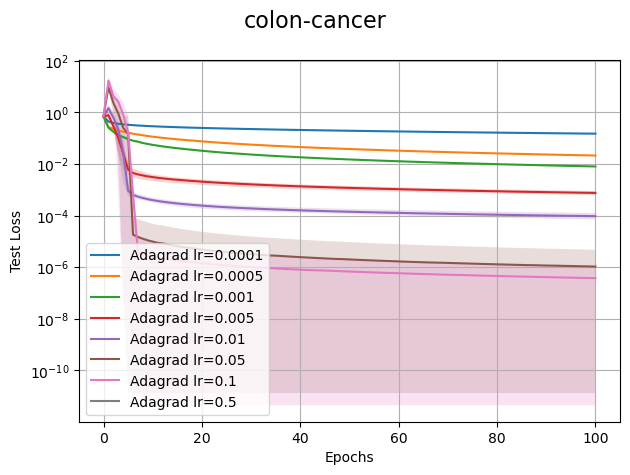

In [60]:
dataset_name = "colon-cancer"
batch_size = 4
n_epochs = 100




scale = 4
optimizer = "Adagrad"
lrs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
colors = list(plt.cm.colors.XKCD_COLORS.keys())
np.random.shuffle(colors)
colors = list(plt.cm.colors.BASE_COLORS) + colors



for lr in lrs:

    histories = []
    for seed in [0, 1, 2, 3, 4]:
        hist = utils.load_results(dataset_name=dataset_name,
                                model_name="linear",
                                scale=scale,
                                batch_size=batch_size, 
                                n_epochs=n_epochs,
                                optimizer=optimizer,
                                lr=lr,
                                seed=seed)
        histories.append(hist)

    losses = []
    for h in histories:
        losses.append(h[f"test/loss"])

    mean_line = np.mean(losses, axis=0)
    max_line = np.max(losses, axis=0)
    min_line = np.min(losses, axis=0)

    x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

    plt.fill_between(x, max_line, min_line, alpha=0.2) 
    plt.semilogy(x, mean_line, label=f"{optimizer} lr={lr}")
    

plt.suptitle(f"{dataset_name}", fontsize=16)
plt.ylabel("Test Loss")
plt.xlabel("Epochs")

plt.legend()
plt.grid()

tight_layout = True
if tight_layout:
    plt.tight_layout()

filename = None
if filename is not None:
    plt.savefig(filename)
else:
    plt.show() 

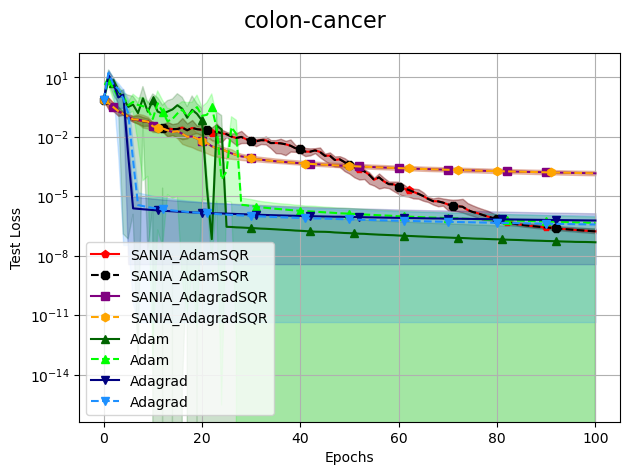

In [62]:
dataset_name = "colon-cancer"
batch_size = 4
n_epochs = 100


scale = 4
optimizers = ["SANIA_AdamSQR", "SANIA_AdamSQR", "SANIA_AdagradSQR", "SANIA_AdagradSQR", "Adam", "Adam", "Adagrad", "Adagrad"]
lrs = [1.0, 1.0, 1.0, 1.0, 0.1, 0.01, 0.5, 0.1]
colors = ["red", "black", "purple", "orange", "darkgreen", "lime", "navy", "dodgerblue"]
linestyles = ["-", "--", "-", "--", "-", "--", "-", "--"]
linewidths = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
markers = ["p", "8", "s", "h", "^", "^", "v", "v"]
scales = [0, scale, 0, scale, 0, scale, 0, scale]

plotter_libsvm(optimizers=optimizers, 
               lrs=lrs,
               colors=colors, 
               linestyles=linestyles, 
               linewidths=linewidths, 
               markers=markers, 
               scales=scales, 
               suptitle=f"{dataset_name}",
               ylabel="Test Loss")